# AI Challenge - Prediction of Spatial Cellular Organization from Histology Images

## Problem Statement
Map the spatial distribution of biological cell types in a tissue slice from routine Histology HE slides.

## Introduction & Background
Histology is a century-old technique critical for clinical diagnosis. However, its interpretation is subjective, time-consuming, and limited to coarse-grained features. In contrast, genomic deep sequencing and spatial transcriptomics provide rich molecular details but are cost-prohibitive and technically demanding.

This challenge invites participants to bridge this gap by predicting cell-type composition directly from HE images, leveraging machine learning to infer spatial patterns of biological signals from routine data.

## Core Challenge
Design a computational pipeline to predict the spatially resolved cell-type composition of a tissue sample. For each spot (~55 μm in diameter), the goal is to predict the abundances of **35 cell types** using image data alone.

## Submission Requirements
- Notebook submissions with run-time ≤ 9 hours (CPU or GPU).
- No external data – only the provided training set and public models/libraries.
- The submission file must be named `submission.csv` and follow the format:
  `ID,C1,C2,...,C35`
  where C1-C35 are the predicted cell-type abundances on the test slide 'S_7'.

## Evaluation
Submissions will be scored by the **Spearman correlation** between predicted and ground truth cell-type abundances.

# 1. Data Loading and Visualization

Below, we load the HE images (both Train and Test) from the HDF5 file and overlay the spot coordinates on the images.

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Visualize Training slides with spot overlays
with h5py.File("/kaggle/input/el-hackathon-2025/elucidata_ai_challenge_data.h5", "r") as h5file:
    train_images = h5file["images/Train"]
    train_spots = h5file["spots/Train"]

    num_train_slides = len(train_images)
    fig, ax = plt.subplots(1, num_train_slides, figsize=(14, 3))
    for i, slide_name in enumerate(train_images.keys()):
        image = np.array(train_images[slide_name])
        spots = np.array(train_spots[slide_name])
        x, y = spots["x"], spots["y"]

        ax[i].imshow(image, aspect="auto")
        ax[i].scatter(x, y, color="red", s=1, alpha=0.4)  # Overlay spot locations
        ax[i].set_title(slide_name)
        ax[i].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
# Visualize Test slide ('S_7')
with h5py.File("/kaggle/input/el-hackathon-2025/elucidata_ai_challenge_data.h5", "r") as h5file:
    test_images = h5file["images/Test"]
    test_spots = h5file["spots/Test"]
    
    sample = 'S_7'
    image = np.array(test_images[sample])
    spots = np.array(test_spots[sample])
    x, y = spots["x"], spots["y"]

    plt.figure(figsize=(6,6))
    plt.imshow(image, aspect="auto")
    plt.scatter(x, y, color="red", s=1, alpha=0.4)
    plt.axis('off')
    plt.title(sample)
    plt.show()

# 2. Loading and Displaying Spots Tables

The following cells load and display the (x, y) coordinates and cell type annotations for Train slides and the spot coordinates for the Test slide.  

In [ ]:
import pandas as pd

# Load and display (x,y) spot locations and cell type annotation table for Train slides
with h5py.File("/kaggle/input/el-hackathon-2025/elucidata_ai_challenge_data.h5", "r") as f:
    train_spots = f["spots/Train"]
    
    # Dictionary to store DataFrames for each slide
    train_spot_tables = {}
    
    for slide_name in train_spots.keys():
        # Load dataset as NumPy structured array
        spot_array = np.array(train_spots[slide_name])
        
        # Convert to DataFrame
        df = pd.DataFrame(spot_array)
        
        # Store in dictionary
        train_spot_tables[slide_name] = df

# Example: Display the spots table for slide 'S_1'
train_spot_tables['S_1']

In [ ]:
# Display spot table for Test slide (only the spot coordinates on 2D array)
with h5py.File("/kaggle/input/el-hackathon-2025/elucidata_ai_challenge_data.h5", "r") as f:
    test_spots = f["spots/Test"]
    spot_array = np.array(test_spots['S_7'])
    test_spot_table = pd.DataFrame(spot_array)
    
# Show the test spots coordinates for slide 'S_7'
test_spot_table

# 3. Creating a Random Submission

In this section, we generate random predictions for the 35 cell types.  
The predictions are random floats between 0 and 2 (without any normalization) for each spot in the Test slide.  
The order of spots is preserved as in the test spots table.

In [ ]:
# Create a random submission
# (predictions of cell type abundances for 35 classes across the Test slide spots;
# spot order should be same as in the 'Test' spots table)

# Use the cell type columns from the train spots table; assuming first two columns are (x, y)
cell_type_columns = train_spot_tables['S_1'].columns[2:].values  # Expecting 35 cell types here
indices = test_spot_table.index.values  # All spots on the Test slide

# Create a 2D array of random floats between 0 and 2 for each spot and cell type
prediction_matrix = 2 * np.random.rand(len(indices), len(cell_type_columns))
predicted_labels = pd.DataFrame(prediction_matrix, columns=cell_type_columns, index=indices)

predicted_labels.head()

# 4. Submission File Generation

Finally, we generate the submission file in the required format.  
Each row corresponds to a test spot with its identifier (constructed here as the index) followed by 35 predictions.

In [ ]:
# Prepare submission DataFrame: spot_id column and then predictions for each cell type
submission_df = predicted_labels.copy()
submission_df.insert(0, 'ID', submission_df.index)

# Save the submission file as submission.csv
submission_df.to_csv("./submission.csv", index=False)
print("Submission file 'submission.csv' created!")

# **EDA**

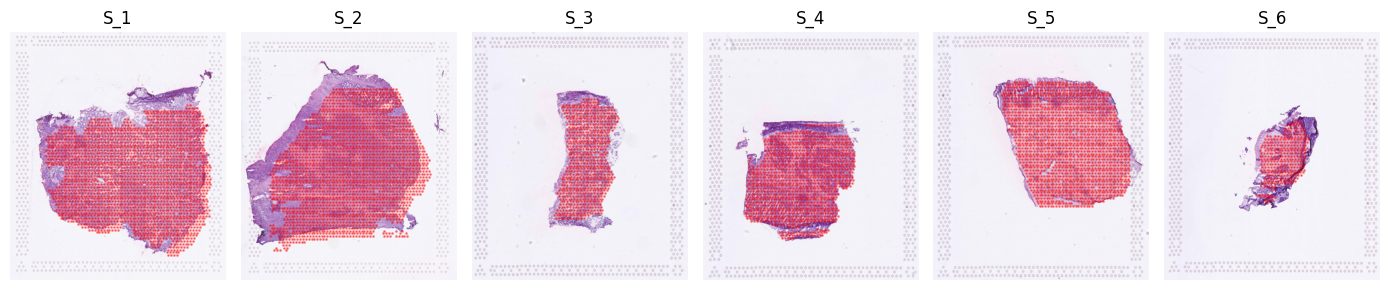

In [21]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load histology images and training spots
with h5py.File("/kaggle/input/el-hackathon-2025/elucidata_ai_challenge_data.h5", "r") as h5file:
    train_images = h5file["images/Train"]
    train_spots = h5file["spots/Train"]
    
    num_train_slides = len(train_images)
    fig, ax = plt.subplots(1, num_train_slides, figsize=(14, 3))
    
    for i, slide_name in enumerate(train_images.keys()):
        image = np.array(train_images[slide_name])
        spots = np.array(train_spots[slide_name])
        x, y = spots["x"], spots["y"]
        
        ax[i].imshow(image, aspect="auto")
        ax[i].scatter(x, y, color="red", s=1, alpha=0.4)  # Overlay spot locations
        ax[i].set_title(slide_name)
        ax[i].axis('off')
    
    plt.tight_layout()
    plt.show()


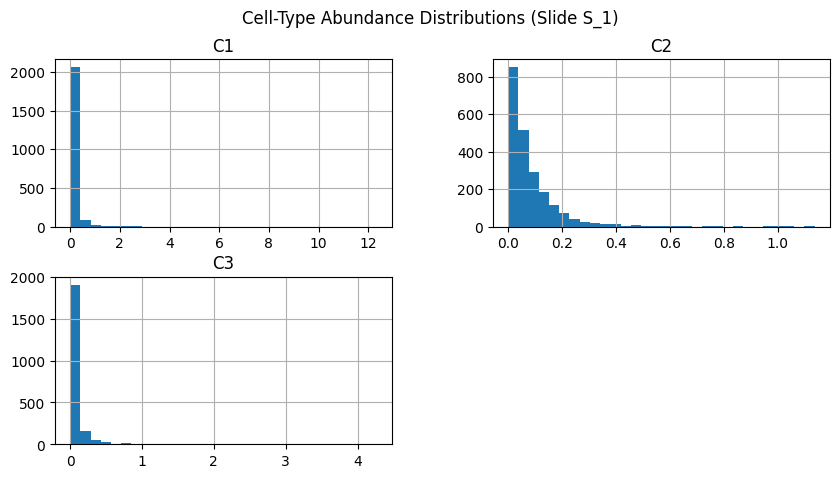

In [22]:
import pandas as pd

# Load spot tables and analyze spatial trends
with h5py.File("/kaggle/input/el-hackathon-2025/elucidata_ai_challenge_data.h5", "r") as h5file:
    train_spots = h5file["spots/Train"]
    train_spot_tables = {}
    
    for slide_name in train_spots.keys():
        spot_array = np.array(train_spots[slide_name])
        df = pd.DataFrame(spot_array)
        train_spot_tables[slide_name] = df

# Example: Analyze cell-type abundance distributions for slide 'S_1'
spot_table_S1 = train_spot_tables['S_1']
spot_table_S1.hist(column=['C1', 'C2', 'C3'], bins=30, figsize=(10, 5))
plt.suptitle("Cell-Type Abundance Distributions (Slide S_1)")
plt.show()


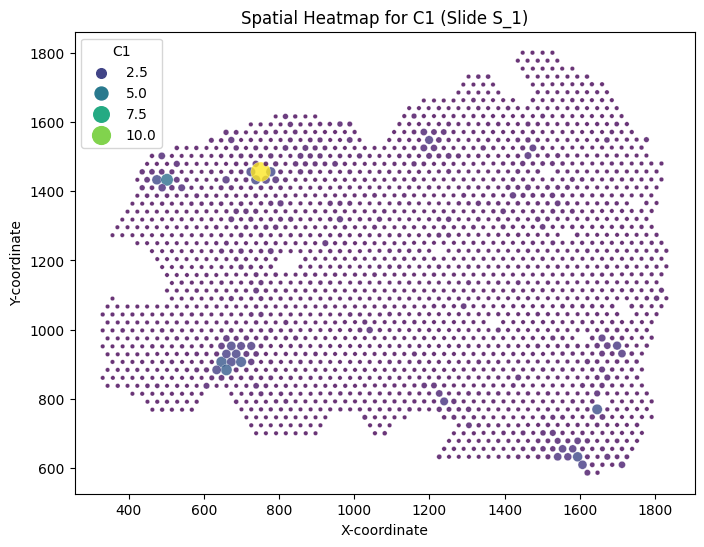

In [27]:
import seaborn as sns

# Example: Heatmap for cell type 'C1' on slide 'S_1'
cell_type = 'C1'
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=spot_table_S1['x'], y=spot_table_S1['y'], size=spot_table_S1[cell_type], sizes=(10, 200),
    hue=spot_table_S1[cell_type], palette="viridis", alpha=0.8
)
plt.title(f"Spatial Heatmap for {cell_type} (Slide S_1)")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()


In [28]:
import h5py
import pandas as pd
import numpy as np

# Load the HDF5 file
file_path = "/kaggle/input/el-hackathon-2025/elucidata_ai_challenge_data.h5"  # Replace with the actual file path
h5file = h5py.File(file_path, "r")

# Check the structure of the file
print("Available groups in the file:", list(h5file.keys()))


Available groups in the file: ['images', 'spots']


In [29]:
# Extract training spot data
train_spots = h5file["spots/Train"]
train_spot_tables = {}

# Loop through slides and store DataFrames
for slide_name in train_spots.keys():
    spot_array = np.array(train_spots[slide_name])  # Convert to NumPy array
    df = pd.DataFrame(spot_array)                  # Convert to DataFrame
    train_spot_tables[slide_name] = df

# Example: Display the spots table for slide 'S_1'
print("Spot table for Slide S_1:")
print(train_spot_tables['S_1'].head())


Spot table for Slide S_1:
      x     y        C1        C2        C3        C4        C5        C6  \
0  1554  1297  0.014401  0.057499  0.022033  0.001704  0.533992  1.511707   
1   462  1502  0.116196  0.197176  0.110600  0.042614  5.587681  0.006885   
2  1488  1548  0.133284  0.035880  0.061352  0.003073  1.104479  0.009174   
3  1725  1182  0.087715  0.235223  0.090382  0.013902  8.760482  0.140912   
4   581  1113  0.128468  0.066399  0.098982  0.047022  3.425771  0.001009   

         C7        C8  ...       C26       C27       C28       C29       C30  \
0  0.015313  0.020029  ...  0.001010  2.068237  0.121361  0.007344  0.000017   
1  0.096346  0.001711  ...  0.000692  0.014442  0.000238  0.024071  0.000023   
2  0.009175  0.000114  ...  0.000096  0.149792  0.001401  0.000699  0.000009   
3  0.188859  0.010154  ...  0.001964  0.142549  0.002036  0.047165  0.000022   
4  0.026881  0.000468  ...  0.000072  0.005920  0.000048  0.006359  0.000585   

        C31       C32       C3

In [30]:
# Extract test spot data for slide 'S_7'
test_spots = h5file["spots/Test"]
spot_array = np.array(test_spots["S_7"])  # Convert to NumPy array
test_spot_table = pd.DataFrame(spot_array)

# Display test spot table
print("Test spot table (S_7):")
print(test_spot_table.head())


Test spot table (S_7):
      x     y  Test_Set
0  1499  1260         2
1  1435  1503         2
2   558  1082         2
3   736  1304         1
4  1257  1592         1


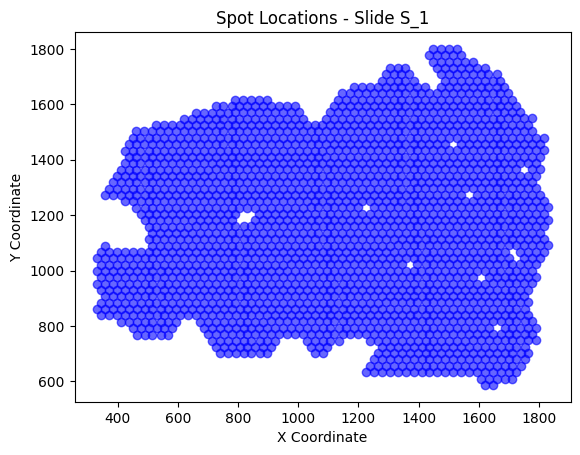

In [31]:
import matplotlib.pyplot as plt

# Visualize spot locations for 'S_1'
spot_table = train_spot_tables['S_1']
plt.scatter(spot_table['x'], spot_table['y'], alpha=0.6, color="blue")
plt.title("Spot Locations - Slide S_1")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2197 non-null   int64  
 1   y       2197 non-null   int64  
 2   C1      2197 non-null   float64
 3   C2      2197 non-null   float64
 4   C3      2197 non-null   float64
 5   C4      2197 non-null   float64
 6   C5      2197 non-null   float64
 7   C6      2197 non-null   float64
 8   C7      2197 non-null   float64
 9   C8      2197 non-null   float64
 10  C9      2197 non-null   float64
 11  C10     2197 non-null   float64
 12  C11     2197 non-null   float64
 13  C12     2197 non-null   float64
 14  C13     2197 non-null   float64
 15  C14     2197 non-null   float64
 16  C15     2197 non-null   float64
 17  C16     2197 non-null   float64
 18  C17     2197 non-null   float64
 19  C18     2197 non-null   float64
 20  C19     2197 non-null   float64
 21  C20     2197 non-null   float64
 22  

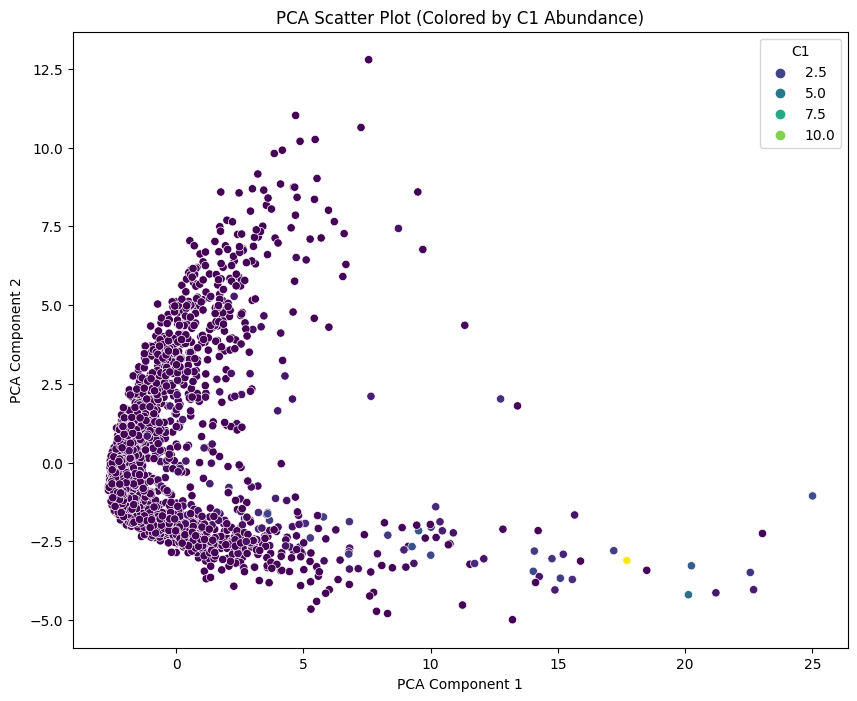

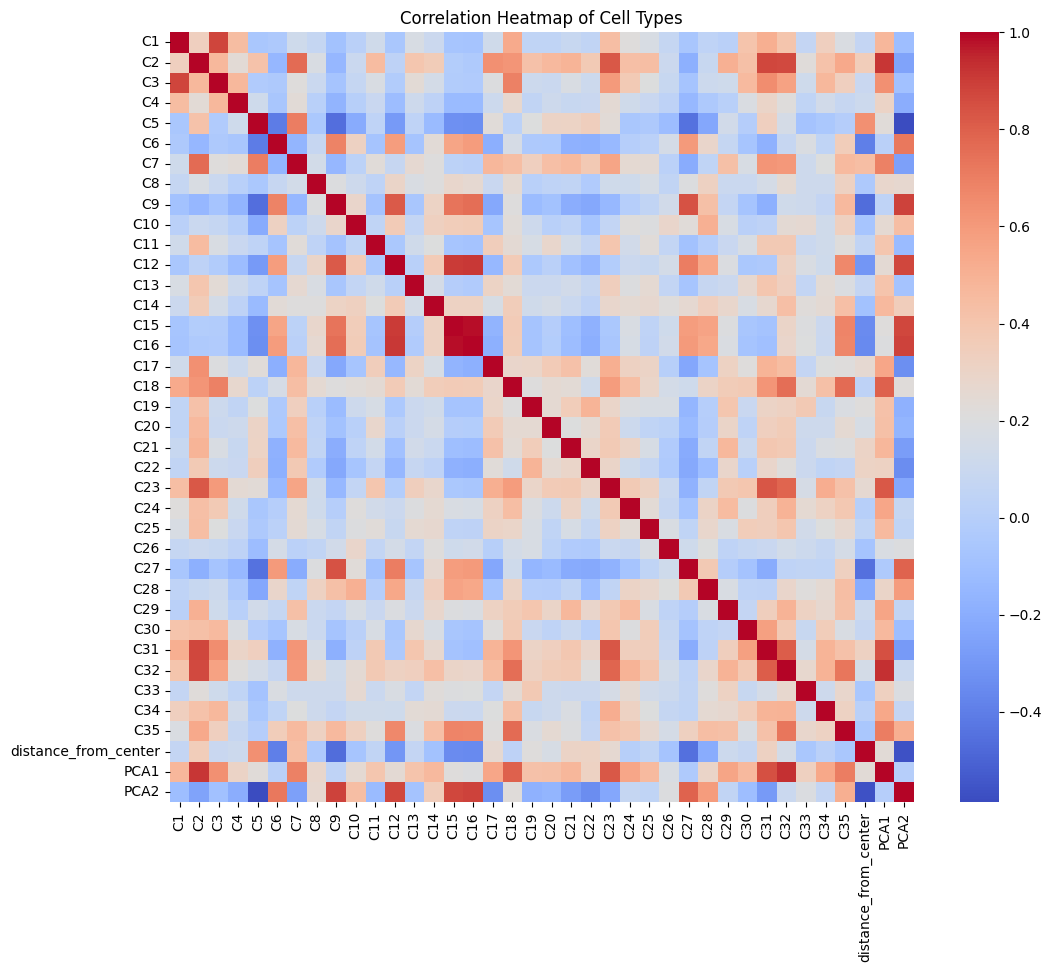

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load Training Spot Data
train_spots_path = "S_1_train_spots.csv"  # Replace with your CSV file path
spot_data = pd.read_csv(train_spots_path)

# Display Basic Info
print(spot_data.info())
print(spot_data.describe())

# Step 1: Spatial Feature Engineering
# Calculate the distance of each spot from the center of the slide
spot_data['distance_from_center'] = np.sqrt(
    (spot_data['x'] - spot_data['x'].mean())**2 +
    (spot_data['y'] - spot_data['y'].mean())**2
)

# Step 2: Feature Normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(spot_data.iloc[:, 2:])  # Assuming x, y are the first two columns
spot_data_normalized = pd.DataFrame(normalized_data, columns=spot_data.columns[2:])

# Step 3: Dimensionality Reduction (PCA)
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_features = pca.fit_transform(spot_data_normalized)
spot_data['PCA1'] = pca_features[:, 0]
spot_data['PCA2'] = pca_features[:, 1]

# Step 4: Visualization
# Scatter Plot of PCA Features
plt.figure(figsize=(10, 8))
sns.scatterplot(x=spot_data['PCA1'], y=spot_data['PCA2'], hue=spot_data['C1'], palette="viridis")
plt.title("PCA Scatter Plot (Colored by C1 Abundance)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Heatmap for Correlation Analysis
correlation_matrix = spot_data.iloc[:, 2:].corr()  # Correlations between cell types
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Cell Types")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270 entries, 0 to 2269
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2270 non-null   int64  
 1   y       2270 non-null   int64  
 2   C1      2270 non-null   float64
 3   C2      2270 non-null   float64
 4   C3      2270 non-null   float64
 5   C4      2270 non-null   float64
 6   C5      2270 non-null   float64
 7   C6      2270 non-null   float64
 8   C7      2270 non-null   float64
 9   C8      2270 non-null   float64
 10  C9      2270 non-null   float64
 11  C10     2270 non-null   float64
 12  C11     2270 non-null   float64
 13  C12     2270 non-null   float64
 14  C13     2270 non-null   float64
 15  C14     2270 non-null   float64
 16  C15     2270 non-null   float64
 17  C16     2270 non-null   float64
 18  C17     2270 non-null   float64
 19  C18     2270 non-null   float64
 20  C19     2270 non-null   float64
 21  C20     2270 non-null   float64
 22  

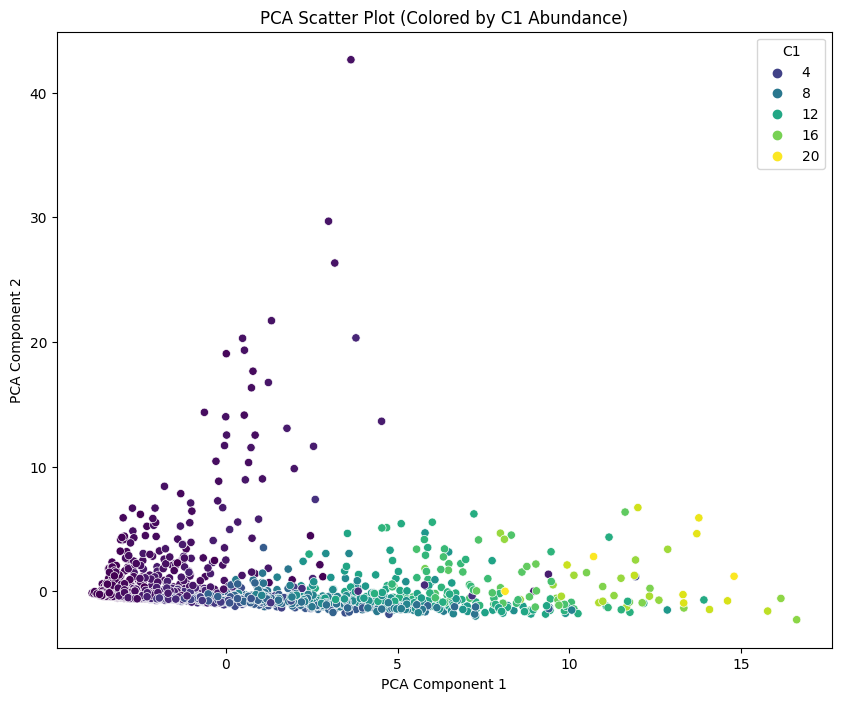

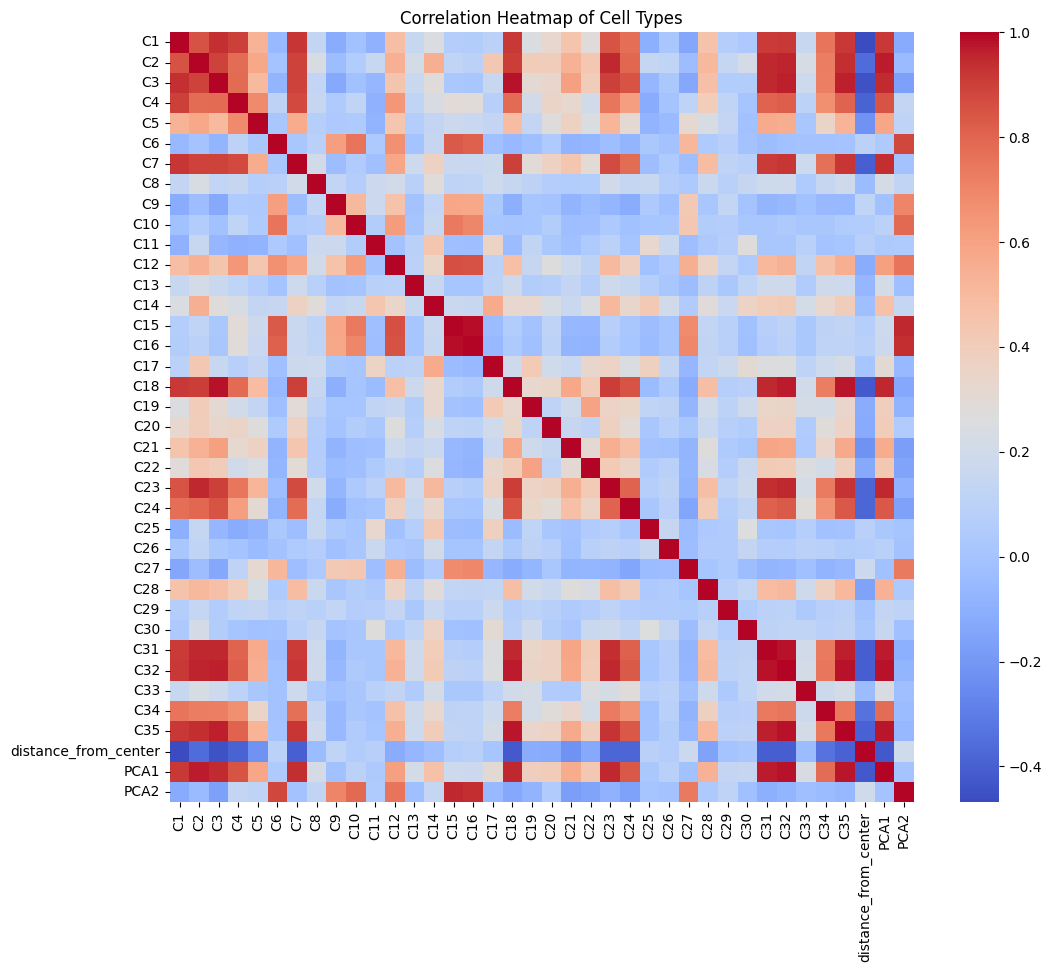

In [35]:
# Load Training Spot Data
train_spots_path = "S_2_train_spots.csv"  # Replace with your CSV file path
spot_data = pd.read_csv(train_spots_path)

# Display Basic Info
print(spot_data.info())
print(spot_data.describe())

# Step 1: Spatial Feature Engineering
# Calculate the distance of each spot from the center of the slide
spot_data['distance_from_center'] = np.sqrt(
    (spot_data['x'] - spot_data['x'].mean())**2 +
    (spot_data['y'] - spot_data['y'].mean())**2
)

# Step 2: Feature Normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(spot_data.iloc[:, 2:])  # Assuming x, y are the first two columns
spot_data_normalized = pd.DataFrame(normalized_data, columns=spot_data.columns[2:])

# Step 3: Dimensionality Reduction (PCA)
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_features = pca.fit_transform(spot_data_normalized)
spot_data['PCA1'] = pca_features[:, 0]
spot_data['PCA2'] = pca_features[:, 1]

# Step 4: Visualization
# Scatter Plot of PCA Features
plt.figure(figsize=(10, 8))
sns.scatterplot(x=spot_data['PCA1'], y=spot_data['PCA2'], hue=spot_data['C1'], palette="viridis")
plt.title("PCA Scatter Plot (Colored by C1 Abundance)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Heatmap for Correlation Analysis
correlation_matrix = spot_data.iloc[:, 2:].corr()  # Correlations between cell types
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Cell Types")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       690 non-null    int64  
 1   y       690 non-null    int64  
 2   C1      690 non-null    float64
 3   C2      690 non-null    float64
 4   C3      690 non-null    float64
 5   C4      690 non-null    float64
 6   C5      690 non-null    float64
 7   C6      690 non-null    float64
 8   C7      690 non-null    float64
 9   C8      690 non-null    float64
 10  C9      690 non-null    float64
 11  C10     690 non-null    float64
 12  C11     690 non-null    float64
 13  C12     690 non-null    float64
 14  C13     690 non-null    float64
 15  C14     690 non-null    float64
 16  C15     690 non-null    float64
 17  C16     690 non-null    float64
 18  C17     690 non-null    float64
 19  C18     690 non-null    float64
 20  C19     690 non-null    float64
 21  C20     690 non-null    float64
 22  C2

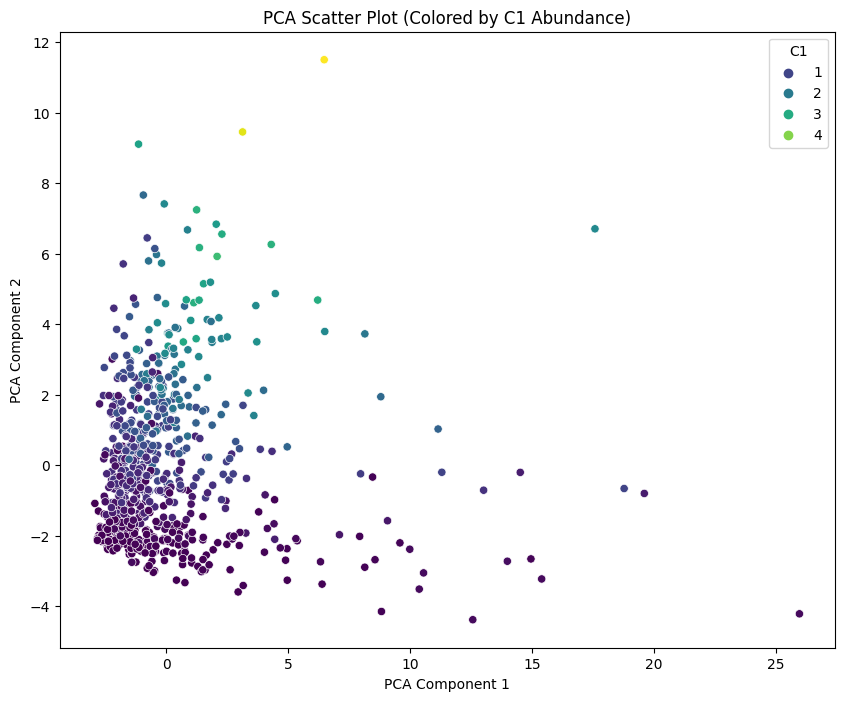

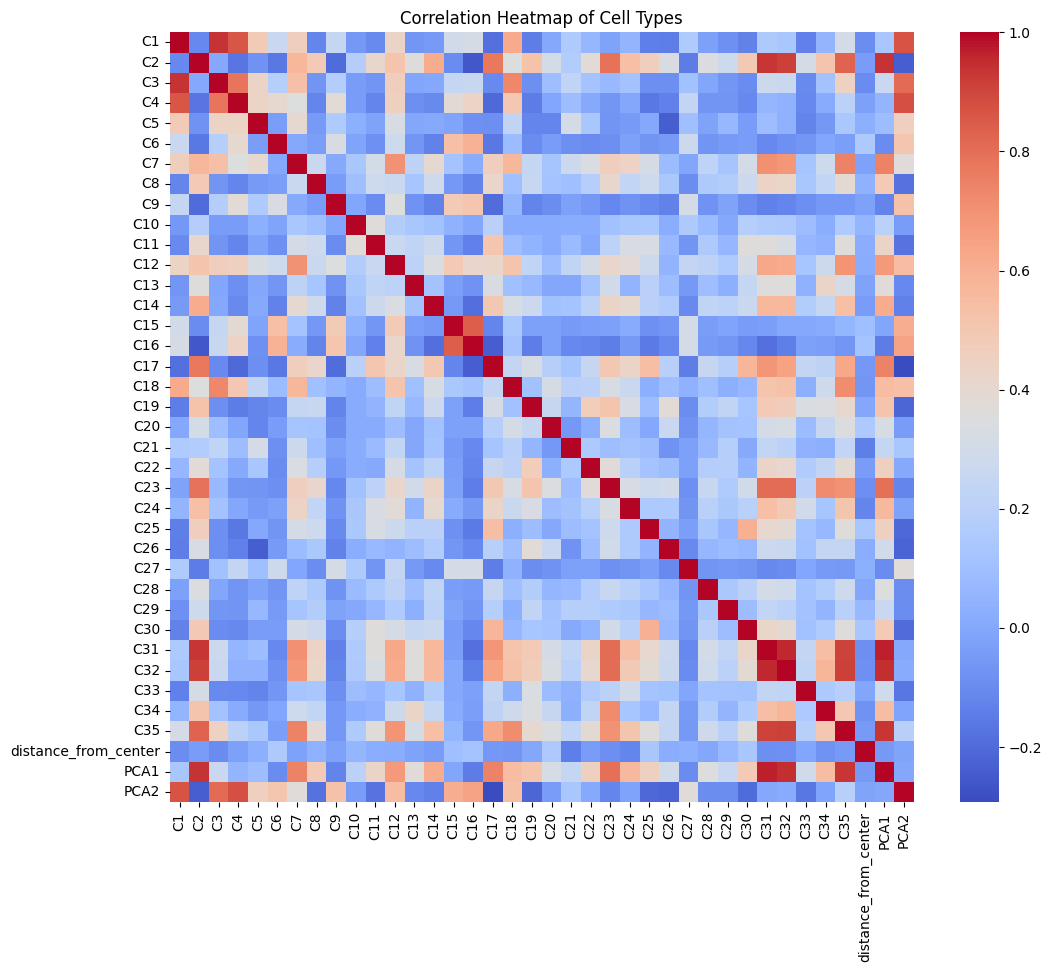

In [36]:
# Load Training Spot Data
train_spots_path = "S_3_train_spots.csv"  # Replace with your CSV file path
spot_data = pd.read_csv(train_spots_path)

# Display Basic Info
print(spot_data.info())
print(spot_data.describe())

# Step 1: Spatial Feature Engineering
# Calculate the distance of each spot from the center of the slide
spot_data['distance_from_center'] = np.sqrt(
    (spot_data['x'] - spot_data['x'].mean())**2 +
    (spot_data['y'] - spot_data['y'].mean())**2
)

# Step 2: Feature Normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(spot_data.iloc[:, 2:])  # Assuming x, y are the first two columns
spot_data_normalized = pd.DataFrame(normalized_data, columns=spot_data.columns[2:])

# Step 3: Dimensionality Reduction (PCA)
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_features = pca.fit_transform(spot_data_normalized)
spot_data['PCA1'] = pca_features[:, 0]
spot_data['PCA2'] = pca_features[:, 1]

# Step 4: Visualization
# Scatter Plot of PCA Features
plt.figure(figsize=(10, 8))
sns.scatterplot(x=spot_data['PCA1'], y=spot_data['PCA2'], hue=spot_data['C1'], palette="viridis")
plt.title("PCA Scatter Plot (Colored by C1 Abundance)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Heatmap for Correlation Analysis
correlation_matrix = spot_data.iloc[:, 2:].corr()  # Correlations between cell types
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Cell Types")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1187 non-null   int64  
 1   y       1187 non-null   int64  
 2   C1      1187 non-null   float64
 3   C2      1187 non-null   float64
 4   C3      1187 non-null   float64
 5   C4      1187 non-null   float64
 6   C5      1187 non-null   float64
 7   C6      1187 non-null   float64
 8   C7      1187 non-null   float64
 9   C8      1187 non-null   float64
 10  C9      1187 non-null   float64
 11  C10     1187 non-null   float64
 12  C11     1187 non-null   float64
 13  C12     1187 non-null   float64
 14  C13     1187 non-null   float64
 15  C14     1187 non-null   float64
 16  C15     1187 non-null   float64
 17  C16     1187 non-null   float64
 18  C17     1187 non-null   float64
 19  C18     1187 non-null   float64
 20  C19     1187 non-null   float64
 21  C20     1187 non-null   float64
 22  

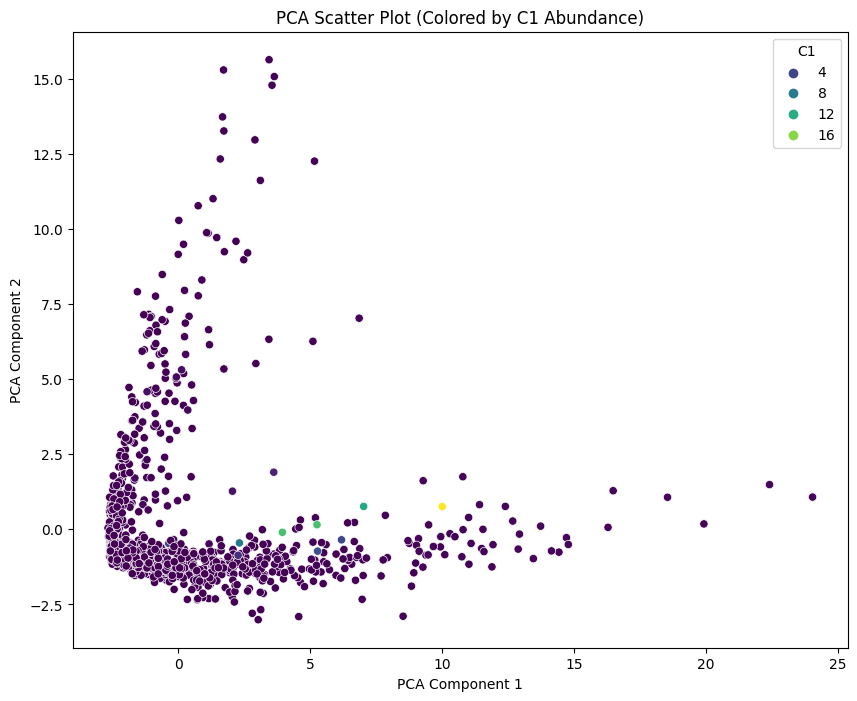

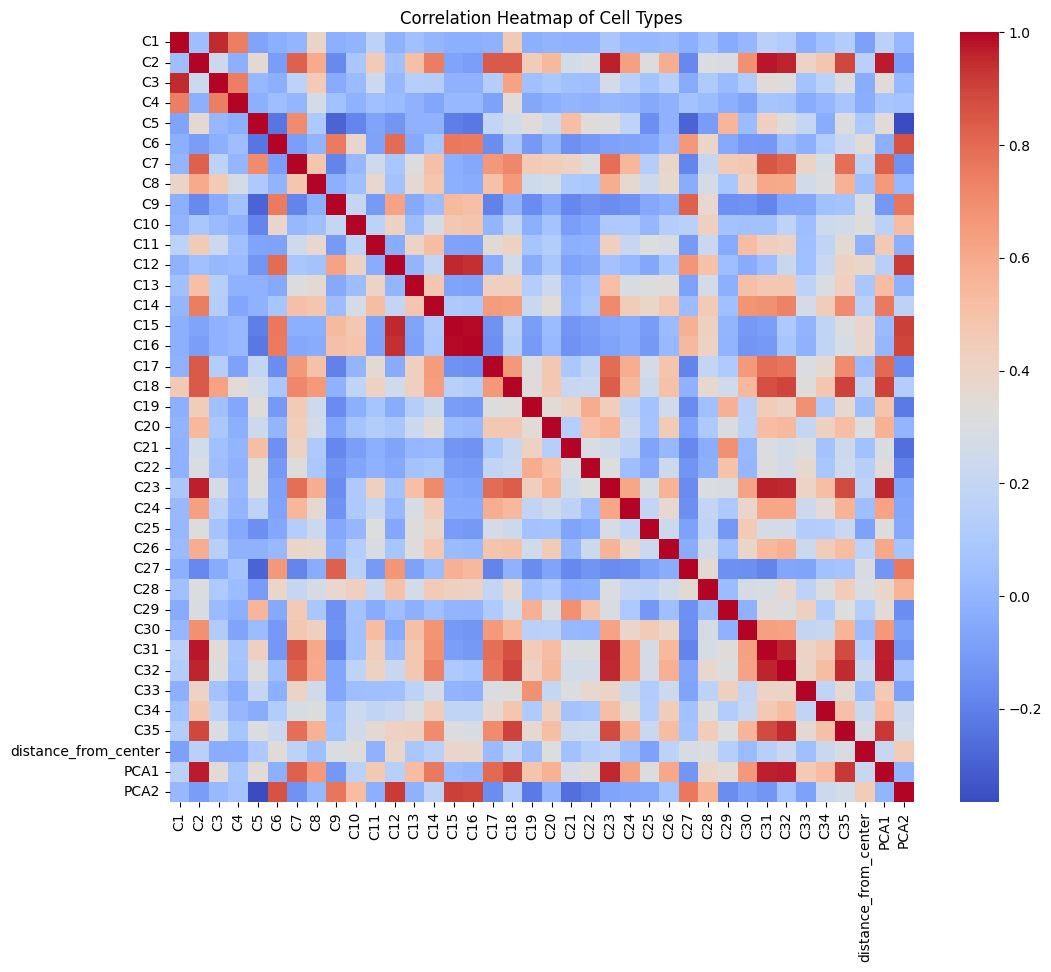

In [37]:
# Load Training Spot Data
train_spots_path = "S_4_train_spots.csv"  # Replace with your CSV file path
spot_data = pd.read_csv(train_spots_path)

# Display Basic Info
print(spot_data.info())
print(spot_data.describe())

# Step 1: Spatial Feature Engineering
# Calculate the distance of each spot from the center of the slide
spot_data['distance_from_center'] = np.sqrt(
    (spot_data['x'] - spot_data['x'].mean())**2 +
    (spot_data['y'] - spot_data['y'].mean())**2
)

# Step 2: Feature Normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(spot_data.iloc[:, 2:])  # Assuming x, y are the first two columns
spot_data_normalized = pd.DataFrame(normalized_data, columns=spot_data.columns[2:])

# Step 3: Dimensionality Reduction (PCA)
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_features = pca.fit_transform(spot_data_normalized)
spot_data['PCA1'] = pca_features[:, 0]
spot_data['PCA2'] = pca_features[:, 1]

# Step 4: Visualization
# Scatter Plot of PCA Features
plt.figure(figsize=(10, 8))
sns.scatterplot(x=spot_data['PCA1'], y=spot_data['PCA2'], hue=spot_data['C1'], palette="viridis")
plt.title("PCA Scatter Plot (Colored by C1 Abundance)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Heatmap for Correlation Analysis
correlation_matrix = spot_data.iloc[:, 2:].corr()  # Correlations between cell types
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Cell Types")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1677 non-null   int64  
 1   y       1677 non-null   int64  
 2   C1      1677 non-null   float64
 3   C2      1677 non-null   float64
 4   C3      1677 non-null   float64
 5   C4      1677 non-null   float64
 6   C5      1677 non-null   float64
 7   C6      1677 non-null   float64
 8   C7      1677 non-null   float64
 9   C8      1677 non-null   float64
 10  C9      1677 non-null   float64
 11  C10     1677 non-null   float64
 12  C11     1677 non-null   float64
 13  C12     1677 non-null   float64
 14  C13     1677 non-null   float64
 15  C14     1677 non-null   float64
 16  C15     1677 non-null   float64
 17  C16     1677 non-null   float64
 18  C17     1677 non-null   float64
 19  C18     1677 non-null   float64
 20  C19     1677 non-null   float64
 21  C20     1677 non-null   float64
 22  

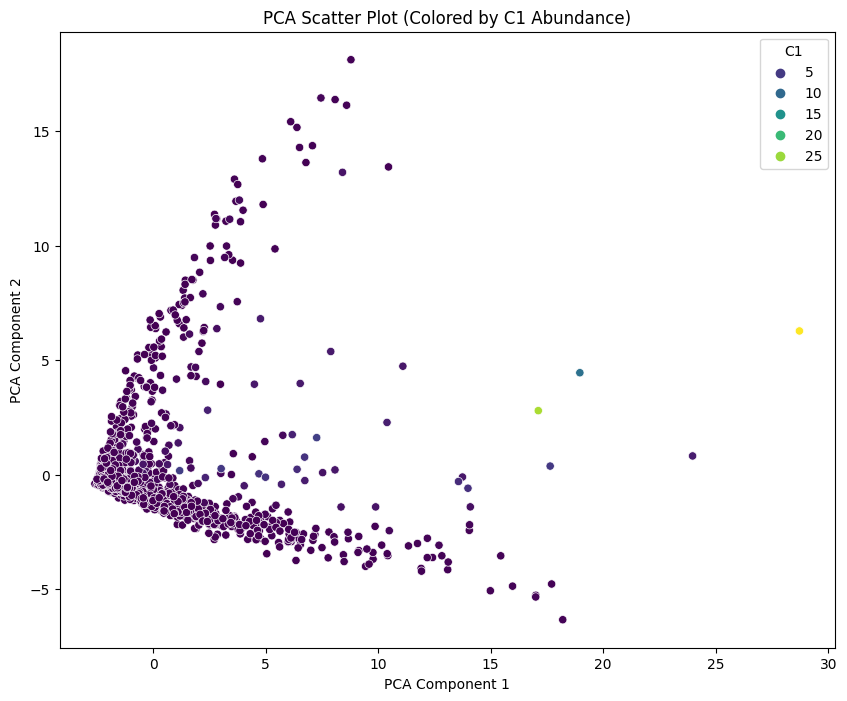

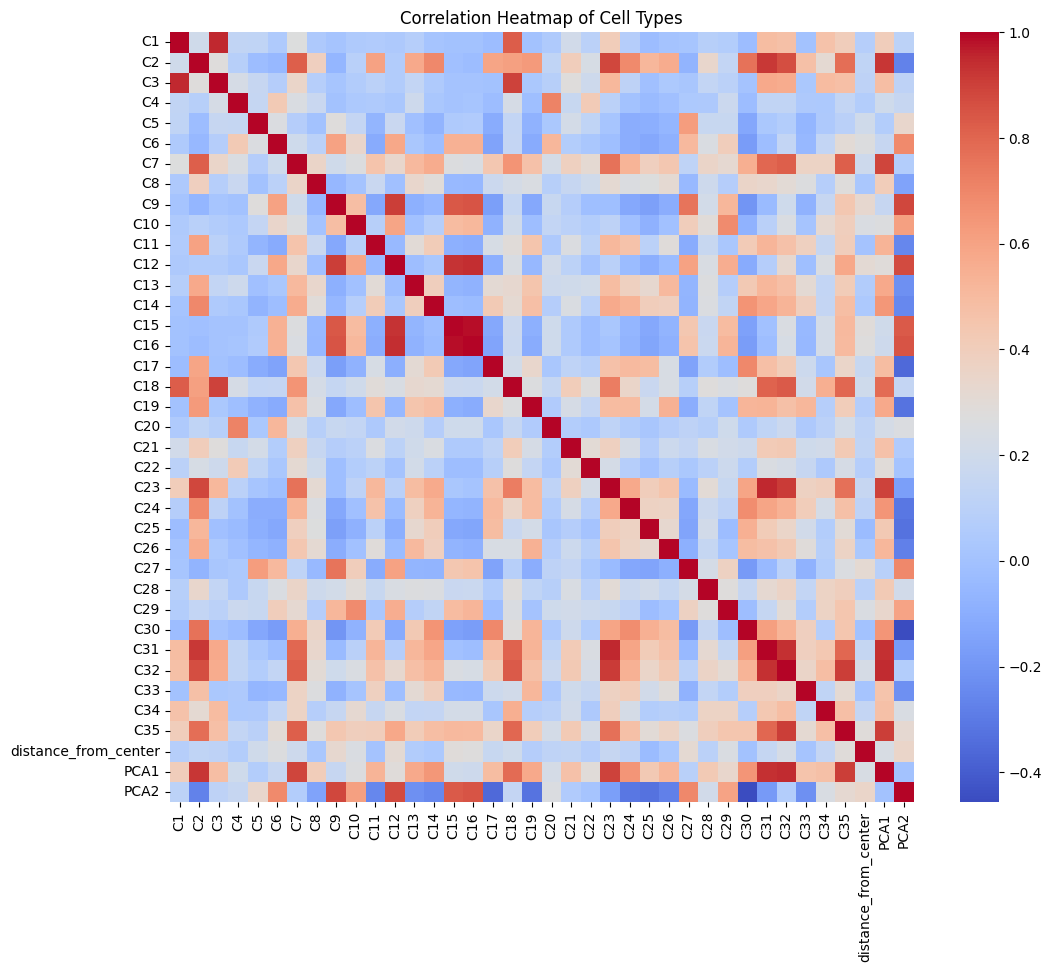

In [38]:
# Load Training Spot Data
train_spots_path = "S_5_train_spots.csv"  # Replace with your CSV file path
spot_data = pd.read_csv(train_spots_path)

# Display Basic Info
print(spot_data.info())
print(spot_data.describe())

# Step 1: Spatial Feature Engineering
# Calculate the distance of each spot from the center of the slide
spot_data['distance_from_center'] = np.sqrt(
    (spot_data['x'] - spot_data['x'].mean())**2 +
    (spot_data['y'] - spot_data['y'].mean())**2
)

# Step 2: Feature Normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(spot_data.iloc[:, 2:])  # Assuming x, y are the first two columns
spot_data_normalized = pd.DataFrame(normalized_data, columns=spot_data.columns[2:])

# Step 3: Dimensionality Reduction (PCA)
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_features = pca.fit_transform(spot_data_normalized)
spot_data['PCA1'] = pca_features[:, 0]
spot_data['PCA2'] = pca_features[:, 1]

# Step 4: Visualization
# Scatter Plot of PCA Features
plt.figure(figsize=(10, 8))
sns.scatterplot(x=spot_data['PCA1'], y=spot_data['PCA2'], hue=spot_data['C1'], palette="viridis")
plt.title("PCA Scatter Plot (Colored by C1 Abundance)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Heatmap for Correlation Analysis
correlation_matrix = spot_data.iloc[:, 2:].corr()  # Correlations between cell types
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Cell Types")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       328 non-null    int64  
 1   y       328 non-null    int64  
 2   C1      328 non-null    float64
 3   C2      328 non-null    float64
 4   C3      328 non-null    float64
 5   C4      328 non-null    float64
 6   C5      328 non-null    float64
 7   C6      328 non-null    float64
 8   C7      328 non-null    float64
 9   C8      328 non-null    float64
 10  C9      328 non-null    float64
 11  C10     328 non-null    float64
 12  C11     328 non-null    float64
 13  C12     328 non-null    float64
 14  C13     328 non-null    float64
 15  C14     328 non-null    float64
 16  C15     328 non-null    float64
 17  C16     328 non-null    float64
 18  C17     328 non-null    float64
 19  C18     328 non-null    float64
 20  C19     328 non-null    float64
 21  C20     328 non-null    float64
 22  C2

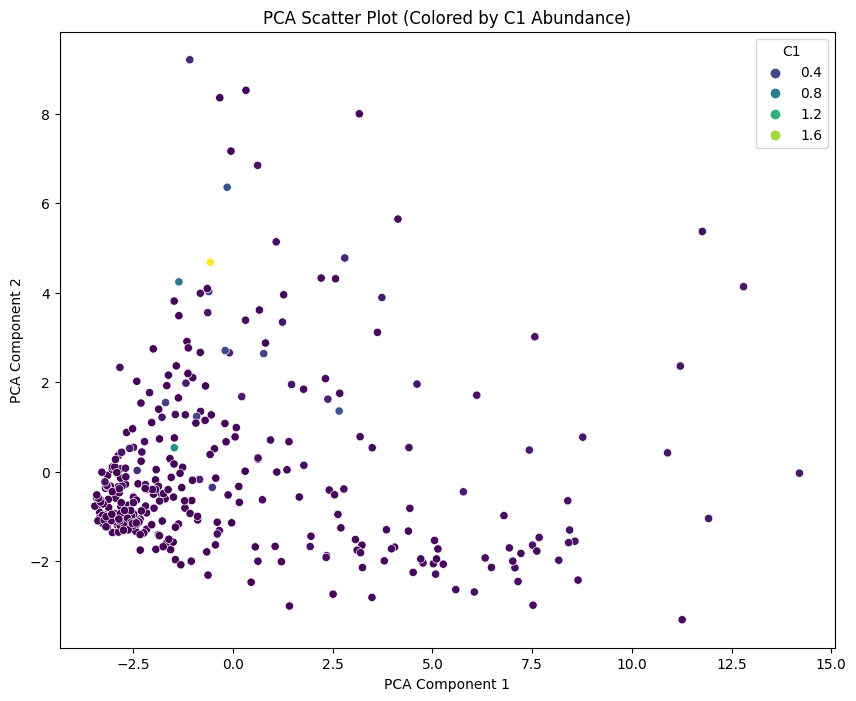

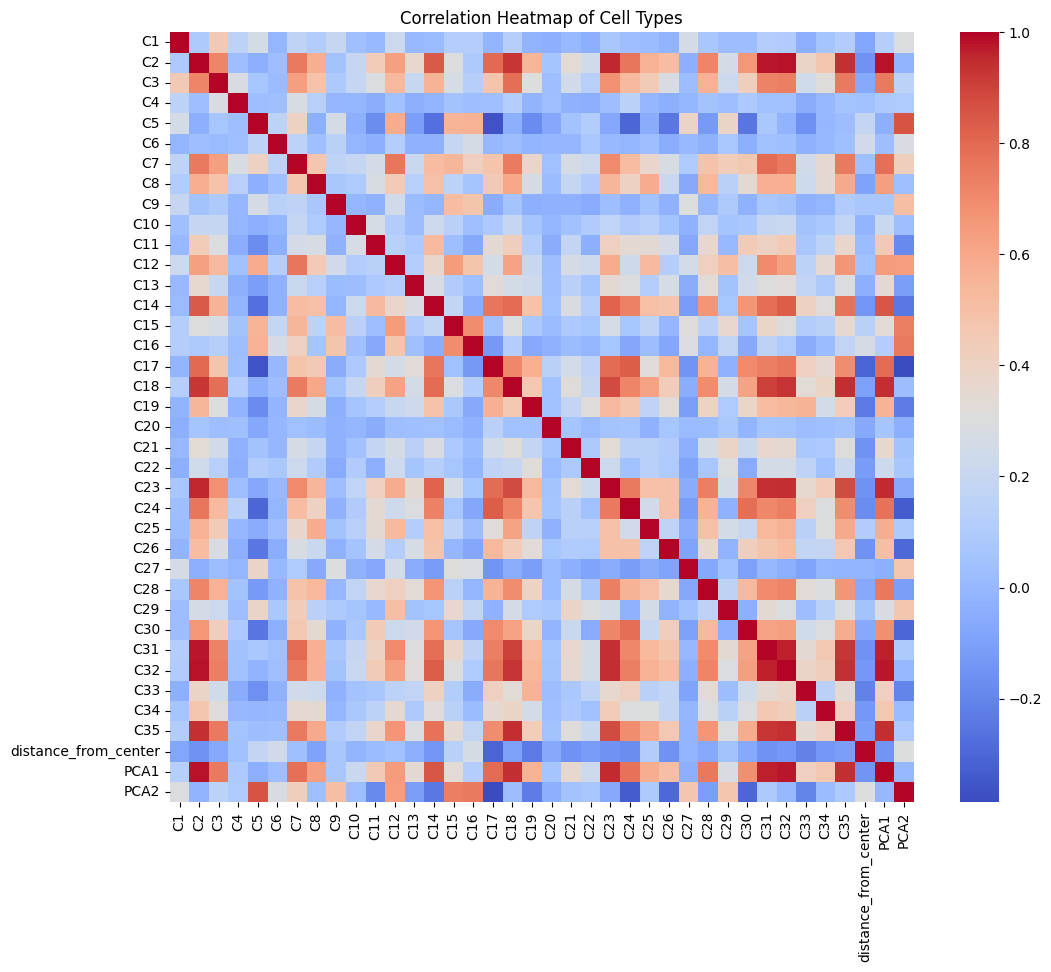

In [39]:
# Load Training Spot Data
train_spots_path = "S_6_train_spots.csv"  # Replace with your CSV file path
spot_data = pd.read_csv(train_spots_path)

# Display Basic Info
print(spot_data.info())
print(spot_data.describe())

# Step 1: Spatial Feature Engineering
# Calculate the distance of each spot from the center of the slide
spot_data['distance_from_center'] = np.sqrt(
    (spot_data['x'] - spot_data['x'].mean())**2 +
    (spot_data['y'] - spot_data['y'].mean())**2
)

# Step 2: Feature Normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(spot_data.iloc[:, 2:])  # Assuming x, y are the first two columns
spot_data_normalized = pd.DataFrame(normalized_data, columns=spot_data.columns[2:])

# Step 3: Dimensionality Reduction (PCA)
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_features = pca.fit_transform(spot_data_normalized)
spot_data['PCA1'] = pca_features[:, 0]
spot_data['PCA2'] = pca_features[:, 1]

# Step 4: Visualization
# Scatter Plot of PCA Features
plt.figure(figsize=(10, 8))
sns.scatterplot(x=spot_data['PCA1'], y=spot_data['PCA2'], hue=spot_data['C1'], palette="viridis")
plt.title("PCA Scatter Plot (Colored by C1 Abundance)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Heatmap for Correlation Analysis
correlation_matrix = spot_data.iloc[:, 2:].corr()  # Correlations between cell types
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Cell Types")
plt.show()


In [43]:
import h5py
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the HDF5 file
file_path = "/kaggle/input/el-hackathon-2025/elucidata_ai_challenge_data.h5"  # Replace with your actual file path
h5file = h5py.File(file_path, "r")

# Extract and process all training spot tables
train_spots = h5file["spots/Train"]
all_train_data = []  # List to store all slide data

for slide_name in train_spots.keys():
    # Extract spot data for each slide
    spot_array = np.array(train_spots[slide_name])
    df = pd.DataFrame(spot_array)
    df['slide_name'] = slide_name  # Add a column for slide identification
    all_train_data.append(df)

# Combine all slides into one DataFrame
all_train_df = pd.concat(all_train_data, ignore_index=True)

# Display combined dataset information
print("Combined Training Dataset Info:")
print(all_train_df.info())

# Step 1: Spatial Feature Engineering
all_train_df['distance_from_center'] = np.sqrt(
    (all_train_df['x'] - all_train_df['x'].mean())**2 +
    (all_train_df['y'] - all_train_df['y'].mean())**2
)

# Exclude non-numerical columns like 'slide_name'
numerical_columns = [col for col in all_train_df.columns if all_train_df[col].dtype in ['int64', 'float64']]
all_train_df_numerical = all_train_df[numerical_columns]

# Normalize only the numerical columns
scaler = StandardScaler()
normalized_data = scaler.fit_transform(all_train_df_numerical)

# Convert back to a DataFrame for ease of use
normalized_df = pd.DataFrame(normalized_data, columns=numerical_columns)
print(normalized_df.head())


# Step 3: Dimensionality Reduction (PCA)
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_features = pca.fit_transform(normalized_df)
all_train_df['PCA1'] = pca_features[:, 0]
all_train_df['PCA2'] = pca_features[:, 1]

# Display PCA results and ensure data is ready for modeling
print("PCA Components Added to DataFrame")
print(all_train_df[['PCA1', 'PCA2']].head())


Combined Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8349 entries, 0 to 8348
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x           8349 non-null   int64  
 1   y           8349 non-null   int64  
 2   C1          8349 non-null   float64
 3   C2          8349 non-null   float64
 4   C3          8349 non-null   float64
 5   C4          8349 non-null   float64
 6   C5          8349 non-null   float64
 7   C6          8349 non-null   float64
 8   C7          8349 non-null   float64
 9   C8          8349 non-null   float64
 10  C9          8349 non-null   float64
 11  C10         8349 non-null   float64
 12  C11         8349 non-null   float64
 13  C12         8349 non-null   float64
 14  C13         8349 non-null   float64
 15  C14         8349 non-null   float64
 16  C15         8349 non-null   float64
 17  C16         8349 non-null   float64
 18  C17         8349 non-null   float64


Summary of the Combined Dataset:
                 x            y           C1           C2           C3  \
count  8349.000000  8349.000000  8349.000000  8349.000000  8349.000000   
mean   1077.346029  1077.986825     1.315875     0.127599     0.910304   
std     347.149079   302.559161     2.955853     0.172966     2.055712   
min     270.000000   396.000000     0.000011     0.000261     0.000083   
25%     832.000000   861.000000     0.016408     0.028648     0.020510   
50%    1073.000000  1082.000000     0.069853     0.070915     0.067104   
75%    1329.000000  1305.000000     0.812378     0.156029     0.530473   
max    1830.000000  1800.000000    29.454552     2.314705    16.949463   

                 C4            C5            C6           C7            C8  \
count  8.349000e+03  8.349000e+03  8.349000e+03  8349.000000  8.349000e+03   
mean   5.073074e-01  1.057699e+00  1.669755e-01     0.050874  1.636851e-02   
std    1.182995e+00  1.837263e+00  4.400061e-01     0.071590  7.52

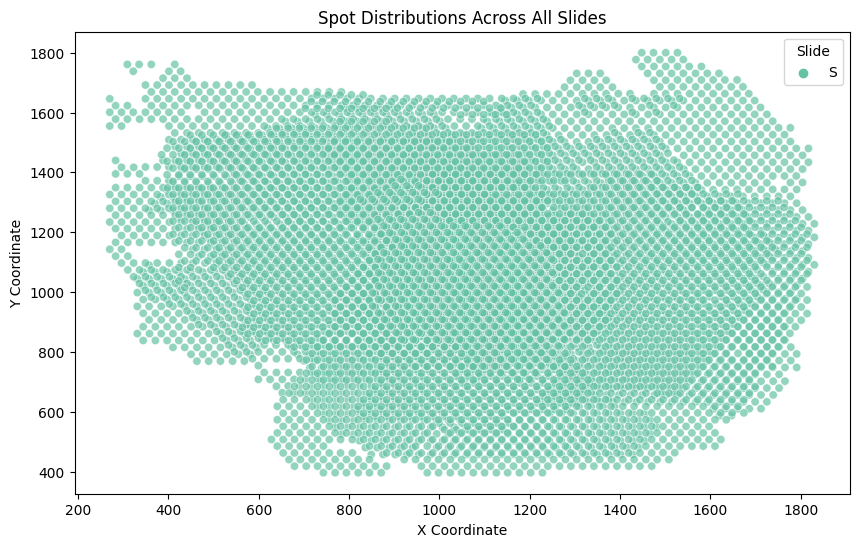

<Figure size 1500x1000 with 0 Axes>

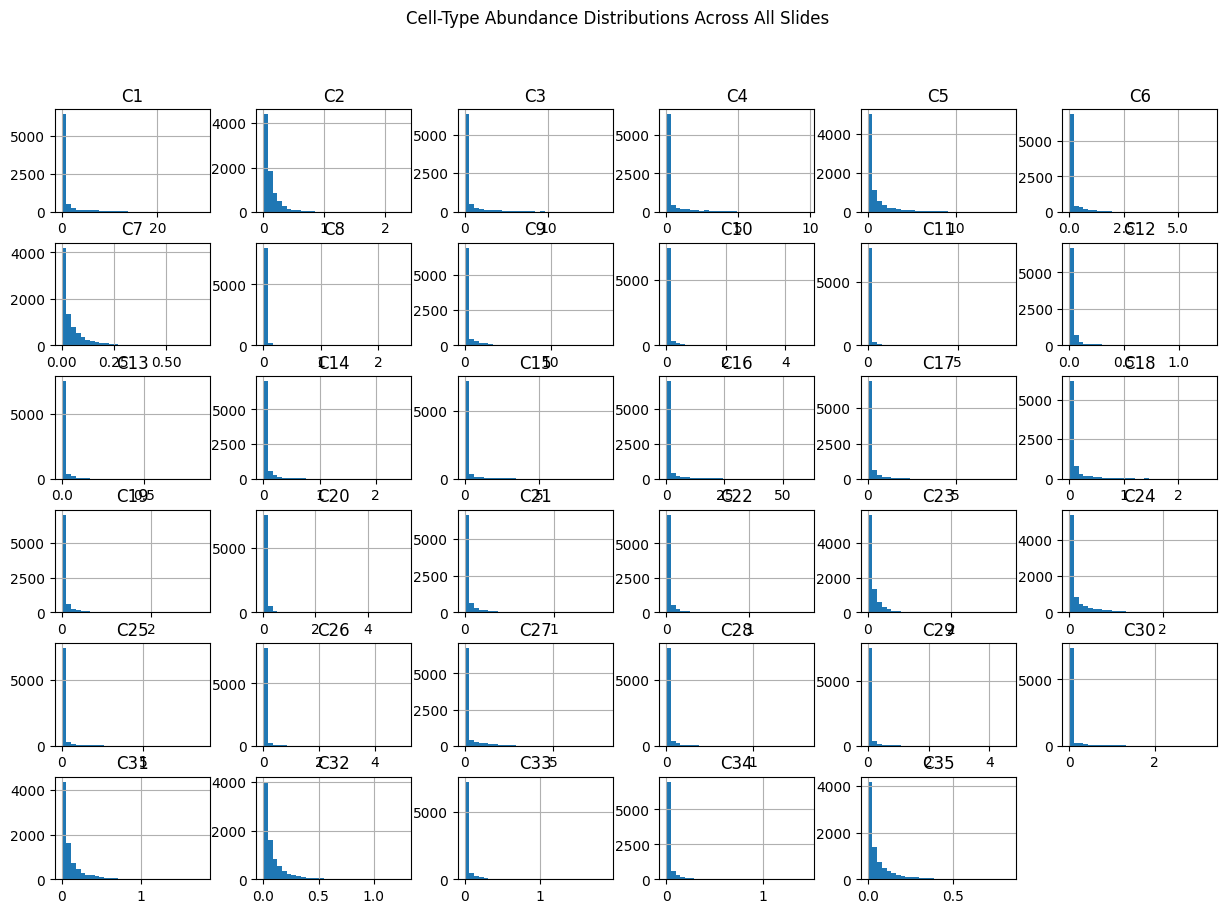

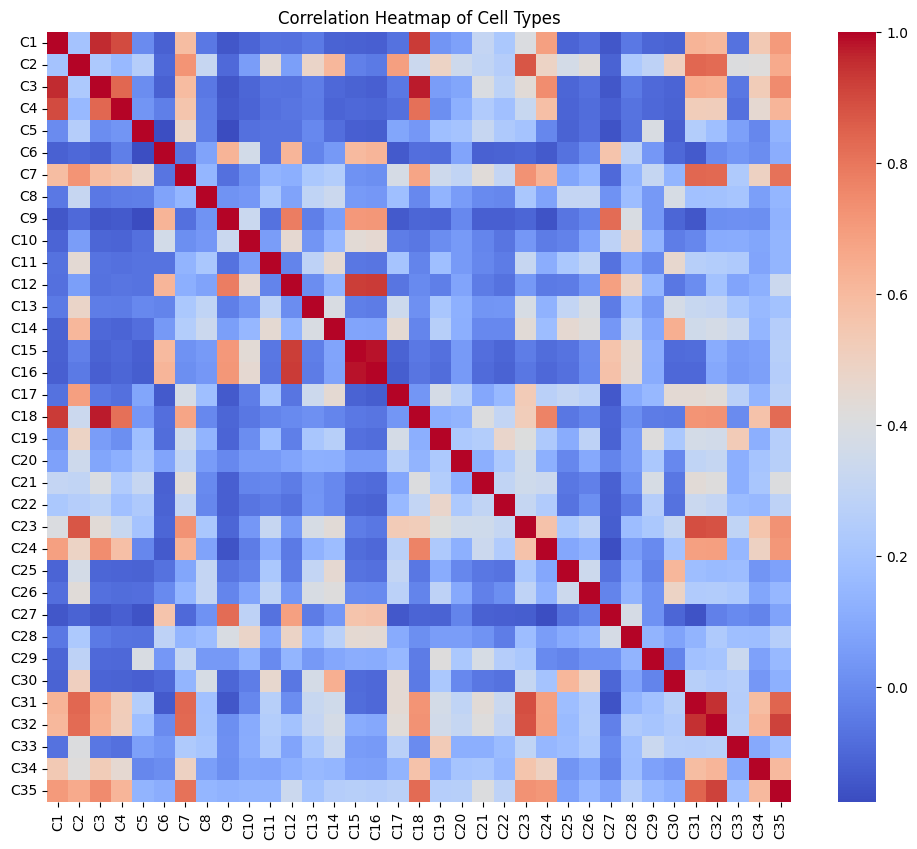

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

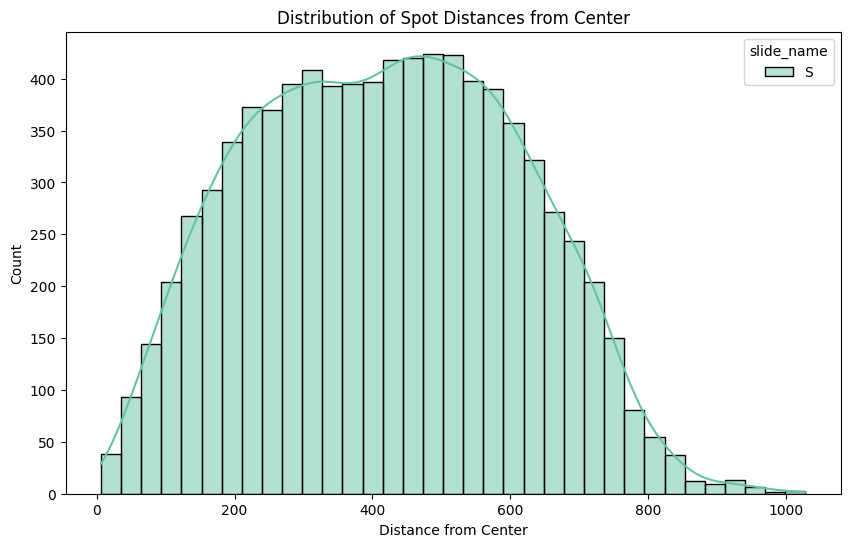

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load all Training Spot Tables
# Assuming all CSVs for each slide have been saved and named as "S_1_train_spots.csv", "S_2_train_spots.csv", etc.
slide_files = ["S_1_train_spots.csv", "S_2_train_spots.csv", "S_3_train_spots.csv", 
               "S_4_train_spots.csv", "S_5_train_spots.csv", "S_6_train_spots.csv"]
all_slides = []

for file in slide_files:
    slide_data = pd.read_csv(file)
    slide_data['slide_name'] = file.split("_")[0]  # Add slide identifier
    all_slides.append(slide_data)

# Combine all data into one DataFrame
combined_data = pd.concat(all_slides, ignore_index=True)

# Step 2: Summary Statistics
print("Summary of the Combined Dataset:")
print(combined_data.describe())

# Step 3: Visualize Spot Distributions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_data['x'], y=combined_data['y'], hue=combined_data['slide_name'], palette="Set2", alpha=0.7)
plt.title("Spot Distributions Across All Slides")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend(title="Slide")
plt.show()

# Step 4: Cell-Type Abundance Distributions
plt.figure(figsize=(15, 10))
combined_data.iloc[:, 2:37].hist(bins=30, figsize=(15, 10))  # Assuming columns C1-C35 are in this range
plt.suptitle("Cell-Type Abundance Distributions Across All Slides")
plt.show()

# Step 5: Correlation Heatmap of Cell Types
correlation_matrix = combined_data.iloc[:, 2:37].corr()  # Correlations between cell types (C1-C35)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Cell Types")
plt.show()

# Step 6: Spatial Trends - Distance from Center
combined_data['distance_from_center'] = np.sqrt(
    (combined_data['x'] - combined_data['x'].mean())**2 + 
    (combined_data['y'] - combined_data['y'].mean())**2
)

plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='distance_from_center', kde=True, hue='slide_name', palette="Set2")
plt.title("Distribution of Spot Distances from Center")
plt.xlabel("Distance from Center")
plt.show()


# **Submission 1: Score=0.42188**

In [2]:
# ==============================================================================
# Imports
# ==============================================================================
import os
import h5py
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# --- Model Specific Imports ---
from tensorflow.keras.applications import ResNet50V2, EfficientNetV2B0
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input as preprocess_efficientnet_v2

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt # Optional
import gc
from tqdm import tqdm
import tensorflow.keras.backend as K

# --- Albumentations ---
try:
    import albumentations as A
    import cv2 # <<< --- ADDED IMPORT FOR OPENCV
    ALBUMENTATIONS_INSTALLED = True
    print(f"Albumentations version: {A.__version__}")
    print(f"OpenCV version: {cv2.__version__}")
except ImportError:
    print("Warning: albumentations or cv2 not found. Advanced augmentations will be limited.")
    ALBUMENTATIONS_INSTALLED = False

# ==============================================================================
# Constants and Configuration
# ==============================================================================
# --- File Paths ---
DATA_FILE_PATH = "/kaggle/input/el-hackathon-2025/elucidata_ai_challenge_data.h5"
OUTPUT_DIR = "./"

# --- Data Parameters ---
TARGET_COLS = [f'C{i}' for i in range(1, 36)]
N_TARGETS = len(TARGET_COLS)
TEST_SLIDE_ID = 'S_7'
ALL_TRAIN_SLIDE_IDS = np.array([f'S_{i}' for i in range(1, 7)])

# --- K-Fold Configuration ---
N_FOLDS = 6

# --- Patch Extraction & Model Parameters ---
PATCH_SIZE = 224
PAD_MODE = 'reflect'

# --- Model Training Parameters (Common for both models unless specified) ---
BATCH_SIZE = 32 # Adjust based on GPU memory
INITIAL_EPOCHS = 50
FINE_TUNE_EPOCHS = 30
INITIAL_LR = 0.001
FINE_TUNE_LR = 0.00005

# Fine-tuning configuration
FINE_TUNE = True
FINE_TUNE_AT_LAYER_RESNET = 150
FINE_TUNE_AT_LAYER_EFFNETV2B0 = 170 # Example, VERIFY by model summary

# --- Augmentation Parameters ---
AUGMENTATION_ENABLED = True
MIXUP_ALPHA = 0.2 # Alpha for MixUp, 0.0 to disable MixUp. Applied after batching.
CUTMIX_PROBABILITY = 0.5 # Probability of applying CutMix within Albumentations.

# --- Callback Parameters ---
EARLY_STOPPING_PATIENCE = 10 # Back to 10 as per baseline
REDUCE_LR_PATIENCE = 5
REDUCE_LR_FACTOR = 0.2
MIN_LR = 1e-6

# --- Stain Normalization ---
STAIN_NORM_ENABLED = False # Disabled as per 0.46151 baseline

# --- Test-Time Augmentation (TTA) ---
TTA_ENABLED = True

# --- Ensure output directory exists ---
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ==============================================================================
# Data Loading Function
# ==============================================================================
def load_slide_data(h5file, slide_id, is_train=True):
    try:
        image_group_path = "images/Train" if is_train else "images/Test"
        spot_group_path = "spots/Train" if is_train else "spots/Test"
        image = np.array(h5file[f"{image_group_path}/{slide_id}"])
        spots_data = np.array(h5file[f"{spot_group_path}/{slide_id}"])
        spots_df = pd.DataFrame(spots_data)
        # print(f"Loaded data for slide {slide_id}. Image shape: {image.shape}, Spots: {len(spots_df)}")
        return image, spots_df
    except KeyError as e:
        print(f"Error loading data for slide {slide_id}: {e}")
        return None, None
    except Exception as e:
        print(f"An unexpected error occurred loading slide {slide_id}: {e}")
        return None, None

# ==============================================================================
# Patch Extraction Function
# ==============================================================================
def extract_patches(image, spots_df, patch_size, is_train=True):
    patches, targets, indices = [], [], []
    half_patch = patch_size // 2
    img_h, img_w, _ = image.shape
    pad_h = pad_w = half_patch
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode=PAD_MODE)
    for idx, spot in spots_df.iterrows():
        center_x, center_y = int(spot['x']) + pad_w, int(spot['y']) + pad_h
        patch = padded_image[center_y - half_patch:center_y + half_patch, center_x - half_patch:center_x + half_patch, :]
        if patch.shape == (patch_size, patch_size, 3):
            patches.append(patch)
            indices.append(idx)
            if is_train: targets.append(spot[TARGET_COLS].values.astype(np.float32))
    patches_np = np.array(patches, dtype=np.uint8)
    indices_np = np.array(indices)
    return (patches_np, np.array(targets, dtype=np.float32), indices_np) if is_train else (patches_np, indices_np)

# ==============================================================================
# Albumentations Augmentation Pipeline
# ==============================================================================
def get_albumentations_transform(is_train=True, cutmix_prob=0.5):
    if not ALBUMENTATIONS_INSTALLED:
        return None
    if is_train:
        transform_list = [ # Renamed to avoid conflict
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.Rotate(limit=45, p=0.5, border_mode=cv2.BORDER_REFLECT_101), # cv2 should be available now
            # A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
            # A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.3),
        ]
        if cutmix_prob > 0:
            transform_list.append(A.CoarseDropout(max_holes=8, max_height=PATCH_SIZE//4, max_width=PATCH_SIZE//4,
                                             min_holes=1, min_height=PATCH_SIZE//8, min_width=PATCH_SIZE//8,
                                             fill_value=0, mask_fill_value=None, p=cutmix_prob))
        return A.Compose(transform_list)
    else:
        return A.Compose([]) # Empty for non-training, TTA handles its own transforms

# Global transform for training (instantiated once)
if ALBUMENTATIONS_INSTALLED:
    train_alb_transform = get_albumentations_transform(is_train=True, cutmix_prob=CUTMIX_PROBABILITY)
else:
    train_alb_transform = None

# ==============================================================================
# MixUp Augmentation (Batch Level)
# ==============================================================================
def mixup_batch(images, labels, alpha=0.2):
    if alpha == 0.0: return images, labels
    batch_size = tf.shape(images)[0]
    l = tf.compat.v1.distributions.Beta(alpha, alpha).sample(batch_size)
    x_l = tf.reshape(l, (batch_size, 1, 1, 1))
    y_l = tf.reshape(l, (batch_size, 1))
    indices = tf.random.shuffle(tf.range(batch_size))
    mixed_images = x_l * images + (1 - x_l) * tf.gather(images, indices)
    mixed_labels = y_l * labels + (1 - y_l) * tf.gather(labels, indices)
    return mixed_images, mixed_labels

# ==============================================================================
# Create tf.data Datasets (Integrating Albumentations)
# ==============================================================================
def augment_with_albumentations(image):
    # This function is designed to be wrapped by tf.py_function
    # It expects a single image tensor as input
    if train_alb_transform:
        # Albumentations expects uint8 image
        data = train_alb_transform(image=image.numpy().astype(np.uint8))
        return data['image'].astype(np.float32)
    return image.numpy().astype(np.float32) # Return original if albumentations not available or not for training

def create_dataset(patches, targets=None, batch_size=32, shuffle=False,
                   augment=False, is_predict=False, preprocess_fn=None,
                   apply_mixup=False, mixup_alpha=0.2):
    if preprocess_fn is None: raise ValueError("preprocess_fn must be provided.")

    if is_predict:
        dataset = tf.data.Dataset.from_tensor_slices(patches)
    elif targets is not None:
        dataset = tf.data.Dataset.from_tensor_slices((patches, targets))
    else:
        raise ValueError("Targets must be provided")

    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(patches) if not is_predict else tf.data.experimental.cardinality(dataset).numpy())

    def map_fn(image, label=None):
        # image_dtype = image.dtype # Store original dtype
        if augment and label is not None and ALBUMENTATIONS_INSTALLED and train_alb_transform is not None:
            # Apply Albumentations using tf.py_function
            # Input to py_function should be a tensor
            aug_img = tf.py_function(func=augment_with_albumentations, inp=[image], Tout=tf.float32)
            aug_img.set_shape([PATCH_SIZE, PATCH_SIZE, 3]) # Crucial to set shape after py_function
            image = aug_img
        
        image = tf.cast(image, tf.float32) # Ensure float32 before model preprocessing
        image = preprocess_fn(image) # Apply model-specific preprocessing

        if label is None: return image
        else: return image, label

    dataset = dataset.map(map_fn, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)

    if apply_mixup and not is_predict and augment: # Apply MixUp after batching, only for training
        dataset = dataset.map(lambda x, y: mixup_batch(x, y, mixup_alpha), num_parallel_calls=tf.data.AUTOTUNE)

    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

# ==============================================================================
# Load ALL Training Data and Test Data
# ==============================================================================
print("\n--- Loading ALL Training and Test Data (Once for all models) ---")
all_train_data_loaded = {}
test_patches_loaded_raw = None
original_test_spot_ids = None
test_indices_ordered = None

try:
    with h5py.File(DATA_FILE_PATH, "r") as h5file:
        for slide_id in ALL_TRAIN_SLIDE_IDS:
            # print(f"\nProcessing training slide: {slide_id}") # Reduce verbosity
            image, spots_df = load_slide_data(h5file, slide_id, is_train=True)
            if image is not None and spots_df is not None:
                patches, targets, _ = extract_patches(image, spots_df, PATCH_SIZE, is_train=True)
                all_train_data_loaded[slide_id] = (patches, targets)
                # print(f"Stored {len(patches)} raw patches for slide {slide_id}")
                del image, spots_df, patches, targets; gc.collect()
            else:
                all_train_data_loaded[slide_id] = (None, None)

        # print(f"\nProcessing test slide: {TEST_SLIDE_ID}") # Reduce verbosity
        test_image, test_spots_df = load_slide_data(h5file, TEST_SLIDE_ID, is_train=False)
        if test_image is not None and test_spots_df is not None:
            original_test_spot_ids = test_spots_df.index.to_numpy()
            test_patches_loaded_raw, test_indices_ordered = extract_patches(test_image, test_spots_df, PATCH_SIZE, is_train=False)
            if not np.array_equal(test_indices_ordered, original_test_spot_ids):
                 print("Warning: Extracted test patch indices do not match original spot IDs order!")
            print(f"Loaded {len(test_patches_loaded_raw)} raw test patches.")
            del test_image, test_spots_df; gc.collect()
        else:
            print(f"Failed to load test data for slide {TEST_SLIDE_ID}.")
except Exception as e:
    print(f"An error occurred during initial data loading: {e}")
    all_train_data_loaded = {}
    test_patches_loaded_raw = None

# ==============================================================================
# Model Builder Function (Parameterized)
# ==============================================================================
def build_model(model_name, input_shape, num_outputs, fine_tune=False, fine_tune_at=None):
    if model_name == "ResNet50V2":
        base_model_fn = ResNet50V2
        default_fine_tune_at = FINE_TUNE_AT_LAYER_RESNET
    elif model_name == "EfficientNetV2B0":
        base_model_fn = EfficientNetV2B0
        default_fine_tune_at = FINE_TUNE_AT_LAYER_EFFNETV2B0
    else:
        raise ValueError(f"Unsupported model_name: {model_name}")

    base_model = base_model_fn(include_top=False, weights='imagenet', input_shape=input_shape)
    current_fine_tune_at = fine_tune_at if fine_tune_at is not None else default_fine_tune_at

    if fine_tune:
        base_model.trainable = True
        print(f"Fine-tuning {model_name} enabled. Unfreezing layers from index {current_fine_tune_at} onwards.")
        for layer_idx, layer in enumerate(base_model.layers): # Corrected iteration
            if layer_idx < current_fine_tune_at:
                layer.trainable = False
    else:
        base_model.trainable = False

    inputs = keras.Input(shape=input_shape)
    x = base_model(inputs, training=base_model.trainable)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_outputs, activation='linear')(x)
    model = keras.Model(inputs, outputs)
    return model, base_model

# ==============================================================================
# Test-Time Augmentation (TTA) Function with Albumentations
# ==============================================================================
def tta_albumentations_transform_wrapper(image_numpy, transform_type_str):
    # This wrapper is for tf.py_function, which expects numpy operations
    # Convert transform_type_str back to a meaningful operation
    image_uint8 = image_numpy.astype(np.uint8)
    if transform_type_str == b"hflip": # tf.py_function passes strings as bytes
        transform = A.Compose([A.HorizontalFlip(p=1.0)])
    elif transform_type_str == b"vflip":
        transform = A.Compose([A.VerticalFlip(p=1.0)])
    elif transform_type_str == b"hvflip":
        transform = A.Compose([A.HorizontalFlip(p=1.0), A.VerticalFlip(p=1.0)])
    else: # Original
        return image_uint8
    return transform(image=image_uint8)['image']


def predict_with_tta(model, raw_patches_for_tta, batch_size=32, preprocess_fn_for_tta=None):
    if preprocess_fn_for_tta is None: raise ValueError("preprocess_fn_for_tta must be provided.")
    if not ALBUMENTATIONS_INSTALLED:
        print("TTA disabled: Albumentations not installed. Predicting on original patches only.")
        temp_ds = create_dataset(raw_patches_for_tta, batch_size=batch_size, is_predict=True, preprocess_fn=preprocess_fn_for_tta)
        return model.predict(temp_ds, verbose=1)

    all_tta_preds = []
    # For TTA, we transform raw patches, then preprocess, then predict
    tta_transform_types = [None, "hflip", "vflip", "hvflip"] # String identifiers for py_function

    for tta_type_str_bytes in tta_transform_types: # Will be passed as bytes if None is not used
        current_tta_type_str = tta_type_str_bytes # Keep as None or string
        print(f"TTA: Predicting on '{current_tta_type_str if current_tta_type_str else 'original'}' patches...")

        if current_tta_type_str is None:
            augmented_patches_raw = raw_patches_for_tta
        else:
            # Apply Albumentations transform for TTA using tf.data.map and py_function
            # This is complex because py_function needs to operate on individual images
            # A simpler way for TTA is to do it in numpy before creating the dataset
            temp_augmented_list = []
            for i in range(raw_patches_for_tta.shape[0]):
                # Simulate what tf.py_function would do, but directly in numpy
                aug_patch_np = tta_albumentations_transform_wrapper(raw_patches_for_tta[i], current_tta_type_str.encode('utf-8'))
                temp_augmented_list.append(aug_patch_np)
            augmented_patches_raw = np.array(temp_augmented_list, dtype=np.uint8)


        # Preprocess for the specific model and create dataset
        temp_ds = create_dataset(augmented_patches_raw, batch_size=batch_size, is_predict=True, preprocess_fn=preprocess_fn_for_tta)
        preds = model.predict(temp_ds, verbose=0) # Reduce verbosity for TTA steps
        all_tta_preds.append(preds)
        del temp_ds, augmented_patches_raw; gc.collect()

    return np.mean(all_tta_preds, axis=0)

# ==============================================================================
# Main K-Fold Training and Ensembling Loop
# ==============================================================================
print("\n--- Starting Main K-Fold Training and Ensembling ---")
model_configs = [
    {"name": "ResNet50V2", "preprocess_fn": preprocess_resnet, "fine_tune_at": FINE_TUNE_AT_LAYER_RESNET},
    {"name": "EfficientNetV2B0", "preprocess_fn": preprocess_efficientnet_v2, "fine_tune_at": FINE_TUNE_AT_LAYER_EFFNETV2B0},
]
all_model_final_predictions = []

if not all_train_data_loaded or all(v[0] is None for v in all_train_data_loaded.values()):
     print("Critical Error: No training data loaded. Cannot proceed.")
elif test_patches_loaded_raw is None:
     print("Critical Error: Test data failed to load. Cannot proceed.")
else:
    for model_config_idx, model_config in enumerate(model_configs): # Added index for random_state
        model_name = model_config["name"]
        preprocess_fn_current = model_config["preprocess_fn"]
        fine_tune_at_current = model_config["fine_tune_at"]
        print(f"\n\n<<<<< Training Model Type: {model_name} >>>>>")
        kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=42 + model_config_idx) # Different random state per model type
        current_model_fold_predictions = []

        slide_indices = np.arange(len(ALL_TRAIN_SLIDE_IDS))
        for fold, (train_idx_indices, val_idx_indices) in enumerate(kf.split(slide_indices)):
            print(f"\n===== {model_name} - FOLD {fold + 1}/{N_FOLDS} =====")
            train_slide_ids = ALL_TRAIN_SLIDE_IDS[train_idx_indices]
            val_slide_id = ALL_TRAIN_SLIDE_IDS[val_idx_indices][0]
            print(f"Training slides: {list(train_slide_ids)}")
            print(f"Validation slide: {val_slide_id}")

            fold_train_patches_list, fold_train_targets_list = [], []
            for slide_id in train_slide_ids:
                patches, targets = all_train_data_loaded.get(slide_id, (None,None))
                if patches is not None and targets is not None: # Check if targets is also not None
                    fold_train_patches_list.append(patches)
                    fold_train_targets_list.append(targets)
            
            if not fold_train_patches_list or not fold_train_targets_list: # Ensure both lists are non-empty
                print(f"Error: Training data incomplete for fold {fold+1}. Skipping.")
                continue

            X_train_fold = np.concatenate(fold_train_patches_list, axis=0)
            y_train_fold = np.concatenate(fold_train_targets_list, axis=0)
            del fold_train_patches_list, fold_train_targets_list; gc.collect()

            X_val_fold, y_val_fold = all_train_data_loaded.get(val_slide_id, (None,None))
            if X_val_fold is None or y_val_fold is None: # Check if y_val_fold is also not None
                print(f"Error: Val data for {val_slide_id} not found. Skipping fold."); continue

            print(f"Fold {fold+1} Train: {X_train_fold.shape}, Val: {X_val_fold.shape}")

            train_ds_fold = create_dataset(X_train_fold, y_train_fold, BATCH_SIZE, shuffle=True, augment=AUGMENTATION_ENABLED, preprocess_fn=preprocess_fn_current, apply_mixup=(MIXUP_ALPHA > 0), mixup_alpha=MIXUP_ALPHA)
            val_ds_fold = create_dataset(X_val_fold, y_val_fold, BATCH_SIZE, shuffle=False, preprocess_fn=preprocess_fn_current)
            del X_train_fold, y_train_fold, X_val_fold, y_val_fold; gc.collect()

            keras.backend.clear_session()
            input_shape = (PATCH_SIZE, PATCH_SIZE, 3)
            
            callbacks_fold = [
                EarlyStopping(monitor='val_loss', patience=EARLY_STOPPING_PATIENCE, verbose=1, restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=REDUCE_LR_FACTOR, patience=REDUCE_LR_PATIENCE, min_lr=MIN_LR, verbose=1)
            ]

            print(f"\n--- Phase 1: Training Head for {model_name} Fold {fold + 1} ---")
            fold_model, base_model_fold = build_model(model_name, input_shape, N_TARGETS, fine_tune=False, fine_tune_at=fine_tune_at_current)
            fold_model.compile(optimizer=keras.optimizers.Adam(learning_rate=INITIAL_LR), loss='mae', metrics=['mae', 'mse'])
            
            history_fold = fold_model.fit(train_ds_fold, epochs=INITIAL_EPOCHS, validation_data=val_ds_fold, callbacks=callbacks_fold, verbose=1)
            initial_epochs_trained = len(history_fold.history['loss']) if history_fold and 'loss' in history_fold.history else 0

            if FINE_TUNE and initial_epochs_trained > 0:
                print(f"\n--- Phase 2: Fine-tuning for {model_name} Fold {fold + 1} ---")
                base_model_fold.trainable = True
                for layer_idx, layer in enumerate(base_model_fold.layers): # Corrected iteration
                    if layer_idx < fine_tune_at_current:
                        layer.trainable = False
                fold_model.compile(optimizer=keras.optimizers.Adam(learning_rate=FINE_TUNE_LR), loss='mae', metrics=['mae', 'mse'])
                fold_model.fit(train_ds_fold, epochs=initial_epochs_trained + FINE_TUNE_EPOCHS, initial_epoch=initial_epochs_trained, validation_data=val_ds_fold, callbacks=callbacks_fold, verbose=1)

            if fold_model is not None and test_patches_loaded_raw is not None:
                print(f"\n--- Predicting Test Set with TTA using {model_name} Fold {fold + 1} Model ---")
                fold_test_pred = predict_with_tta(fold_model, test_patches_loaded_raw, batch_size=BATCH_SIZE, preprocess_fn_for_tta=preprocess_fn_current)
                current_model_fold_predictions.append(fold_test_pred)
                print(f"Stored TTA predictions from {model_name} fold {fold + 1}.")
            
            del train_ds_fold, val_ds_fold, fold_model, base_model_fold; keras.backend.clear_session(); gc.collect()
        
        if current_model_fold_predictions:
            avg_preds_for_current_model = np.mean(current_model_fold_predictions, axis=0)
            all_model_final_predictions.append(avg_preds_for_current_model)
            print(f"\n<<<<< Finished training and prediction for {model_name}. Averaged {len(current_model_fold_predictions)} folds. >>>>>")
        else:
            print(f"\n<<<<< No predictions generated for {model_name}. Skipping this model in ensemble. >>>>>")

    print("\n--- All Model K-Fold Trainings Finished ---")

# ==============================================================================
# Averaging Predictions from ALL Models and Generating Submission WITH POST-PROCESSING
# ==============================================================================
print("\n--- Averaging All Model Predictions, Post-processing, and Generating Submission ---")

if all_model_final_predictions and original_test_spot_ids is not None:
    if not all_model_final_predictions: # Check if list is empty
        print("Error: No predictions from any model were stored.")
    else:
        # Average predictions across different model types
        final_ensembled_predictions = np.mean(all_model_final_predictions, axis=0)
        print(f"Final ensembled predictions shape: {final_ensembled_predictions.shape}")

        print("Applying non-negative clipping to predictions...")
        processed_predictions = np.clip(final_ensembled_predictions, 0, None)
        
        print("Applying rank transformation to predictions...")
        ranked_predictions = np.apply_along_axis(lambda x: x.argsort().argsort(), 1, processed_predictions).astype(np.float32)
        
        if len(ranked_predictions) != len(original_test_spot_ids):
             print(f"Error: Processed predictions count mismatch with original spot IDs!")
        else:
            submission_df = pd.DataFrame(ranked_predictions, columns=TARGET_COLS)
            submission_df.insert(0, 'ID', original_test_spot_ids)
            submission_file_path = os.path.join(OUTPUT_DIR, "submission.csv")
            submission_df.to_csv(submission_file_path, index=False)
            print(f"Submission file created successfully at: {submission_file_path}")
            print(f"Submission DataFrame head:\n{submission_df.head()}")
else:
    if not all_model_final_predictions: print("Cannot generate submission: No model predictions were stored.")
    if original_test_spot_ids is None: print("Cannot generate submission: Original test spot IDs missing.")

print("\n--- Script Finished ---")



Albumentations version: 1.4.20
OpenCV version: 4.10.0

--- Loading ALL Training and Test Data (Once for all models) ---
Loaded 2088 raw test patches.

--- Starting Main K-Fold Training and Ensembling ---


<<<<< Training Model Type: ResNet50V2 >>>>>

===== ResNet50V2 - FOLD 1/6 =====
Training slides: ['S_2', 'S_3', 'S_4', 'S_5', 'S_6']
Validation slide: S_1
Fold 1 Train: (6152, 224, 224, 3), Val: (2197, 224, 224, 3)

--- Phase 1: Training Head for ResNet50V2 Fold 1 ---
94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 53s 200ms/step - loss: 0.3121 - mae: 0.3121 - mse: 1.2744 - val_loss: 0.2778 - val_mae: 0.2778 - val_mse: 2.1044 - learning_rate: 0.0010
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - loss: 0.2303 - mae: 0.2303 - mse: 1.2734 - val_loss: 0.2801 - val_mae: 0.2801 - val_mse: 2.0958 - learning_rate: 0.0010
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - loss: 0.2348 - mae: 0.2348 - mse: 1.2797 - val_loss: 0.2793 - va

# **Submission 02: Score= 0.58543, ranked 123/355**

In [3]:
!pip install tensorflow-addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.
ydata-profiling 4.12.2 requires typeguard<5,>=3, but you have typeguard 2.13.3 which is incompatible.


In [1]:
import os
import gc
import h5py
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# --- File Paths ---
DATA_FILE_PATH = "/kaggle/input/el-hackathon-2025/elucidata_ai_challenge_data.h5"
OUTPUT_DIR = "./"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# --- Data Params ---
TARGET_COLS = [f'C{i}' for i in range(1, 36)]
PATCH_SIZE = 224
PAD_MODE = 'reflect'
BATCH_SIZE = 32
N_FOLDS = 6
TEST_SLIDE_ID = 'S_7'
ALL_TRAIN_SLIDES = [f'S_{i}' for i in range(1,7)]

# --- Load & Extract Patches ---
def load_slide(h5file, slide, train=True):
    img = np.array(h5file[f"images/{'Train' if train else 'Test'}/{slide}"])
    spots = pd.DataFrame(np.array(h5file[f"spots/{'Train' if train else 'Test'}/{slide}"]))
    return img, spots

def extract_patches(img, spots):
    half = PATCH_SIZE//2
    img_p = np.pad(img, ((half,half),(half,half),(0,0)), mode=PAD_MODE)
    xs, ys, idx = [], [], []
    for i, row in spots.iterrows():
        x, y = int(row['x'])+half, int(row['y'])+half
        patch = img_p[y-half:y+half, x-half:x+half]
        if patch.shape==(PATCH_SIZE,PATCH_SIZE,3):
            xs.append(patch)
            if 'C1' in row:
                ys.append(row[TARGET_COLS].values.astype(np.float32))
            idx.append(i)
    return np.array(xs, dtype=np.uint8), np.array(ys, dtype=np.float32) if ys else None, np.array(idx)

# --- Dataset with TF MixUp on batched data ---
def create_ds(x, y=None, shuffle=False, augment=False):
    if y is not None:
        ds = tf.data.Dataset.from_tensor_slices((x, y))
    else:
        ds = tf.data.Dataset.from_tensor_slices(x)
    if shuffle:
        ds = ds.shuffle(buffer_size=1024)
    ds = ds.batch(BATCH_SIZE)
    def _map_train(a, b):
        a = preprocess_input(tf.cast(a, tf.float32))
        # MixUp on batch
        lam = tf.random.uniform([], 0, 1)
        idx = tf.random.shuffle(tf.range(tf.shape(a)[0]))
        a2 = tf.gather(a, idx)
        b2 = tf.gather(b, idx)
        a_mix = lam * a + (1 - lam) * a2
        b_mix = lam * b + (1 - lam) * b2
        return a_mix, b_mix

    def _map_pred(a):
        a = preprocess_input(tf.cast(a, tf.float32))
        return a

    if augment and y is not None:
        ds = ds.map(_map_train, num_parallel_calls=tf.data.AUTOTUNE)
    elif y is None:
        ds = ds.map(_map_pred, num_parallel_calls=tf.data.AUTOTUNE)
    else:
        ds = ds.map(lambda a, b: (preprocess_input(tf.cast(a, tf.float32)), b), num_parallel_calls=tf.data.AUTOTUNE)
    return ds.prefetch(tf.data.AUTOTUNE)

# --- Build Model ---
def build_model():
    base = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(PATCH_SIZE,PATCH_SIZE,3))
    base.trainable = False
    x = GlobalAveragePooling2D()(base.output)
    x = Dropout(0.3)(x)
    out = Dense(len(TARGET_COLS), activation='linear')(x)
    return Model(base.input, out)

# --- Main Training Loop ---
with h5py.File(DATA_FILE_PATH,'r') as f:
    train_data = {s: extract_patches(*load_slide(f, s, True))[:2] for s in ALL_TRAIN_SLIDES}
    test_x, _, test_idx = extract_patches(*load_slide(f, TEST_SLIDE_ID, False))

# create test dataset
test_ds = create_ds(test_x, augment=False)
preds = []

for fold, (tr, val) in enumerate(KFold(n_splits=N_FOLDS, shuffle=True, random_state=42).split(ALL_TRAIN_SLIDES)):
    tr_slides = [ALL_TRAIN_SLIDES[i] for i in tr]
    val_slide = ALL_TRAIN_SLIDES[val[0]]
    X_tr = np.concatenate([train_data[s][0] for s in tr_slides])
    Y_tr = np.concatenate([train_data[s][1] for s in tr_slides])
    X_val, Y_val = train_data[val_slide]

    ds_tr = create_ds(X_tr, Y_tr, shuffle=True, augment=True)
    ds_val = create_ds(X_val, Y_val, shuffle=False, augment=False)

    model = build_model()
    model.compile(optimizer='adam', loss='mean_absolute_error')
    callbacks = [
        EarlyStopping(patience=5, restore_best_weights=True),
        ReduceLROnPlateau(patience=3, factor=0.2, min_lr=1e-6),
        ModelCheckpoint(f'model_{fold}.keras', save_best_only=True)
    ]
    model.fit(ds_tr, validation_data=ds_val, epochs=50, callbacks=callbacks)

    preds.append(model.predict(test_ds))
    gc.collect()

# --- Save Submission ---
avg = np.mean(preds, axis=0)
sub = pd.DataFrame(avg, columns=TARGET_COLS)
sub.insert(0, 'ID', test_idx)
sub.to_csv(os.path.join(OUTPUT_DIR,'submission.csv'), index=False)

print("\n--- Submission done ---")


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 56s 174ms/step - loss: 0.2656 - val_loss: 0.2846 - learning_rate: 0.0010
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.2595 - val_loss: 0.2825 - learning_rate: 0.0010
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.2593 - val_loss: 0.2758 - learning_rate: 0.0010
Epoch 4/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.2582 - val_loss: 0.2789 - learning_rate: 0.0010
Epoch 5/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.2568 - val_loss: 0.2799 - learning_rate: 0.0010
Epoch 6/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.2586 - val_loss: 0.2840 - learning_rate: 0.0010
Epoch 7/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.2734 - val_loss: 0.2793 - learning_rate: 2.0000e-04
Epoch 8/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.2719 - val_loss: 0.2801 - learning_rate: 2.0000e-04
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step
Ep